In [1]:
!pip install lxml


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import os

## Loading all the data

In [3]:
def read_xml_files(folder_path):
    """Read all XML files in a folder and return a concatenated DataFrame."""
    # List all XML files in the folder
    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
    
    # Read each XML file and append to a list
    df_list = []
    for xml_file in xml_files:
        file_path = os.path.join(folder_path, xml_file)
        df = pd.read_xml(file_path)
        df_list.append(df)

    print(len(df_list), "XML files read.")
    
    # Concatenate all DataFrames in the list
    concatenated_df = pd.concat(df_list, ignore_index=True)
    
    return concatenated_df

In [4]:
print(os.getcwd())

/Users/s2745401/Documents/AIP/code/AIP_NLS_data


In [7]:
data = read_xml_files('nls-catalogue-published-material/nls-catalogue-published-material_dc')


51 XML files read.


In [8]:
data

,title,creator,type,publisher,date,language,subject,description,rights,identifier,relation,coverage,format
0,Anglo-russkii slovar' po mikroelektronike : ok...,"Prokhorov, K. IA.(Konstantin IAkovlevich)",text,Moskva Russkii iazyk,1985,rus,Microelectronics,None,None,None,None,None,None
1,Local government finance in Scotland: rate sup...,Great Britain.Scottish Office.,text,[Edinburgh] Scottish Office,1985,eng,Local finance,None,None,None,None,None,None
2,The correlation of monthly rainfall with posit...,Commonwealth Scientific and Industrial Researc...,text,Melbourne : Commonwealth Scientific and Indust...,1958.,eng,Rainfall anomalies,In a folder with thirteen folded maps.,None,None,None,None,None
3,Catalogue,Peter Deloford (Bookseller),text,London P. Deloford,[1974]-,eng,Antiquarian booksellers,None,None,None,None,None,None
4,Control of pests and diseases of grass and for...,None,text,"Alnwick MAFF, ADAS",1985,eng,Grasses,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091422,Textbook of fish culture breeding and cultivat...,"Kahn, Henry.",text,London Fishing News,[1973],eng,Fish-culture.,Bibliographyp.425-436,None,None,None,None,None
5091423,Tax planning a service or crime?,"Carmichael, K. S.(Keith Stanley).",text,London Institute of Chartered Accountants in E...,[1969],eng,Tax accounting,None,None,None,None,None,None
5091424,Tables for use in high resolution mass spectro...,"Cleaver, R. L.",text,London Heyden,1970,eng,Mass spectrometry,Notebook format. [28]p. booklet in pocket. Pag...,None,None,None,None,None
5091425,A systems approach to community college education,"Barbee, David E.",text,Princeton [Croydon] Auerbach,1972,eng,Municipal junior colleges,Bibliographyp.161-174. - Includes index,None,None,None,None,None


## Somne data descriptions

In [9]:
data.language.describe()

count     5091057
unique        367
top           eng
freq      4171764
Name: language, dtype: object

In [10]:
data.language.unique() 

array(['rus', 'eng', 'und', 'lat', 'iri', '   ', 'pol', 'wel', 'fre',
       'ger', 'zxx', 'ita', 'spa', 'hrv', 'per', 'swe', 'ewo', 'ara',
       'gla', 'dut', 'slo', 'sco', 'gre', 'nor', 'mul', 'alb', 'dan',
       'scc', 'bul', 'mis', 'cor', 'por', 'chi', 'lit', 'jpn', 'grc',
       'heb', 'rum', 'bre', 'gle', 'epo', 'hun', 'cat', 'slv', 'enm',
       'tur', 'ice', 'ang', 'guj', 'ben', 'kor', 'd  ', 'snh', 'baq',
       'kon', 'tog', 'nic', 'ful', 'fao', 'fri', 'cze', 'frm', 'may',
       'swa', 'ukr', 'asm', '|||', 'nya', 'kan', 'syr', 'fin', 'arm',
       'esp', 'twi', 'vie', 'gaa', 'ind', 'oji', 'kur', None, 'srp',
       'yor', 'afr', 'tha', 'mon', 'fro', 'mao', 'men', 'zul', 'bem',
       'mac', 'inc', 'est', 'yao', 'urd', 'mal', 'kin', 'cam', 'gal',
       'btk', 'esk', 'ton', 'ada', 'pan', 'art', 'max', 'int', 'pli',
       'aze', 'hin', 'glg', 'lan', 'som', 'map', 'roa', 'eth', 'mlt',
       'pro', 'lug', 'tam', 'bel', 'smi', 'tib', 'fat', 'ijo', 'sho',
       '|d', 'lav', '

## Where all the cleaning happens! 
Here we also long information on what we normalize and how messy the data is 

### Helper functions

In [13]:
import json
import numpy as np

# Loading dict to map language codes to full language names
with open('nls-catalogue-published-material/language_codes.json', 'r') as f:
    lang_code_map = json.load(f)

In [14]:
print(lang_code_map.get('eng'))  # Example to check if loading was successful

English


In [16]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import unicodedata
import itertools

def get_unique_and_missing_values(df, df_clean, normalization_log, col):
    col_data = df[col].copy()  # Original data for comparison
    normalization_log[col] = []
        # Step 1: Handle ONLY truly null representations - be conservative!
    null_values = ['NA', 'N/A', 'null', 'Null', 'NULL', 'nan', 'NaN', 'None']
    df_clean[col] = df_clean[col].replace(null_values, np.nan)
        # Only replace empty strings and single spaces in non-language columns
    if 'language' not in col.lower():
        df_clean[col] = df_clean[col].replace(['', '  '], np.nan)
        df_clean[col] = df_clean[col].replace(r'^\s*$', np.nan, regex=True)
    else:
            # For language column, only treat empty string as null
        df_clean[col] = df_clean[col].replace(['', '   '], np.nan)
    missing_count = df_clean[col].isna().sum()
    unique_count = df_clean[col].nunique(dropna=True)
    return col_data,missing_count,unique_count

def visualise_missing_value_types(df, cols=None):
    import matplotlib.pyplot as plt

    if cols is None:
        cols = df.columns

    # Use the same null_values as defined above
    null_values = ['NA', 'N/A', 'null', 'Null', 'NULL', 'nan', 'NaN', 'None']

    # Define types of missing/empty values to check
    missing_types = {
        'np.nan': lambda x: pd.isna(x),
        'empty string': lambda x: x == '',
        'single space': lambda x: x == ' ',
        'multiple spaces': lambda x: isinstance(x, str) and x.strip() == '' and len(x) > 1,
    }
    # Add each null value as its own type
    for nv in null_values:
        missing_types[f"'{nv}'"] = lambda x, nv=nv: str(x).strip() == nv

    summary = {}
    for col in cols:
        col_data = df[col]
        counts = {}
        for mtype, func in missing_types.items():
            counts[mtype] = col_data.apply(func).sum()
        summary[col] = counts

    summary_df = pd.DataFrame(summary).T

    # Assign a unique color to each missing type
    color_cycle = plt.cm.tab20.colors + plt.cm.Set3.colors + plt.cm.Pastel1.colors
    colors = dict(zip(summary_df.columns, itertools.cycle(color_cycle)))

    ax = summary_df.plot(kind='bar', stacked=True, figsize=(14, 7), color=[colors[col] for col in summary_df.columns])
    plt.title('Frequency of Different Types of Missing/Empty Values per Column')
    plt.ylabel('Count')
    plt.xlabel('Column')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Missing Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def has_garbage_chars(text):
    for char in text:
        # Check for control characters (except common whitespace)
        if unicodedata.category(char) in ['Cc', 'Cf', 'Cs', 'Co', 'Cn']:
            if char not in ['\t', '\n', '\r']:
                return True
        # Check for replacement character (indicates encoding issues)
        if char == '\ufffd':
            return True
    return False

def print_everything(df_clean, normalization_log, col, missing_count, unique_count, messy, mixed_types, high_cardinality, single_value, value_counts):
    print(f"Column: {col}")
    print(f"  Unique values: {unique_count}")
    print(f"  Missing values: {missing_count}, {missing_count / len(df_clean):.2%}")
    print(f"  Messy data examples ({len(messy)}): {messy[:5]}{'...' if len(messy) > 5 else ''}")
    print(f"  Mixed types: {mixed_types}")
    print(f"  High cardinality: {high_cardinality}")
    print(f"  Single value: {single_value}")
    if normalization_log[col]:
        print(f"  Normalizations applied:")
        for norm in normalization_log[col]:
            print(f"    - {norm}")
    top_values = value_counts.head(10)
    print(f"  Top 10 value frequencies: {top_values.to_dict()}")
    bottom_values = value_counts.tail(10)
    print(f"  Bottom 10 value frequencies: {bottom_values.to_dict()}")
    print("-" * 40)

def detect_suspicious_patterns(normalization_log, col, messy, non_null):
    garbage_chars = non_null[non_null.apply(has_garbage_chars)]
    if len(garbage_chars) > 0:
        examples = garbage_chars.unique().tolist()[:10]
        messy.extend(examples)
        normalization_log[col].append(f"Found {len(garbage_chars)} values with garbage/control characters")
            
            # Check for suspicious patterns (but not legitimate punctuation or diacritics)
            # Only flag things like excessive punctuation, weird symbols
    suspicious = non_null[non_null.str.contains(r'[#@$%^*+=<>{}\\|`~]|[!?]{3,}|\.{4,}', regex=True, na=False)]
    if len(suspicious) > 0:
        examples = suspicious.unique().tolist()[:10]
        messy.extend(examples)
        normalization_log[col].append(f"Found {len(suspicious)} values with suspicious patterns")

def clean_extra_spaces(df_clean, normalization_log, col, messy, non_null):
    multi_space = non_null[non_null.str.contains(r'\s{2,}', regex=True, na=False)]
    if len(multi_space) > 0:
        examples = multi_space.unique().tolist()[:10]
        messy.extend(examples)
        df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)
        normalization_log[col].append(f"Normalized multiple spaces in {len(multi_space)} values")

def normalize_case_variants(df_clean, normalization_log, col, unique_count, messy):
    if unique_count < 1000:
        case_variants = {}
        for val in df_clean[col].dropna().astype(str).unique():
            normalized = val.lower()
            if normalized not in case_variants:
                case_variants[normalized] = []
            case_variants[normalized].append(val)
        inconsistent_case = {k: v for k, v in case_variants.items() if len(v) > 1}
        if inconsistent_case:
            examples = list(inconsistent_case.values())[:5]
            messy.extend([f"{items}" for items in examples[:3]])
            normalization_log[col].append(f"Found {len(inconsistent_case)} values with inconsistent capitalization")

def clean_final_stops(df_clean, normalization_log, col, messy, non_null):
    final_stops = non_null[non_null.str.endswith('.')]
    if len(final_stops) > 0:
        examples = final_stops.unique().tolist()[:10]
        messy.extend(examples)
        df_clean[col] = df_clean[col].str.rstrip('.')
        normalization_log[col].append(f"Removed final stops from {len(final_stops)} values")

def trim_whitespace(df_clean, normalization_log, col, messy, needs_trim):
    if len(needs_trim) > 0:
        examples = needs_trim.unique().tolist()[:10]
        messy.extend(examples)
        df_clean[col] = df_clean[col].str.strip()
        normalization_log[col].append(f"Trimmed whitespace from {len(needs_trim)} values")

def normalize_date_format(df_clean, normalization_log, col, col_data, messy):
    non_null = col_data.dropna().astype(str)
    # Valid date patterns: 1234, 1234., 1234-, etc. (no brackets allowed)
    date_pattern = r'^\s*\d{4}[\.-]?\s*$'
    messy_mask = ~non_null.str.match(date_pattern, na=False) | non_null.str.contains(r'\[|\]', regex=True)
    messy.extend(non_null[messy_mask].unique().tolist())
    original_values = df_clean[col].copy()
    df_clean[col] = df_clean[col].astype(str).str.extract(r'(\d{4})', expand=False)
    # remove years after today
    current_year = pd.Timestamp.now().year
    future_mask = df_clean[col].astype(float) > current_year
    future_years = df_clean.loc[future_mask, col]
    if not future_years.empty:
        for idx in future_years.index:
            year_val = df_clean.at[idx, col]
            title_val = df_clean.at[idx, 'title'] if 'title' in df_clean.columns else None
            author_val = df_clean.at[idx, 'author'] if 'author' in df_clean.columns else None
            messy.extend({'year': year_val, 'title': title_val, 'author': author_val})
        df_clean.loc[future_mask, col] = np.nan
        normalization_log[col].append(
            f"Removed {future_years.count()} future years; logged title and author for these entries. Example: {messy[-min(3, len(future_years)):] if len(future_years) > 0 else ''}"
        )
    #messy.extend(future_years)
    # Remove years that are too old to be true (pre-1450)
    too_old_mask = df_clean[col].astype(float) < 1450
    too_old_years = df_clean.loc[too_old_mask, col]
    if not too_old_years.empty:
        # Record title and author for each too-old year
        for idx in too_old_years.index:
            year_val = df_clean.at[idx, col]
            title_val = df_clean.at[idx, 'title'] if 'title' in df_clean.columns else None
            author_val = df_clean.at[idx, 'author'] if 'author' in df_clean.columns else None
            messy.extend({'year': year_val, 'title': title_val, 'author': author_val})
        df_clean.loc[too_old_mask, col] = np.nan
        normalization_log[col].append(
            f"Removed {too_old_years.count()} years pre-1450; logged title and author for these entries. Example: {messy[-min(3, len(too_old_years)):] if len(too_old_years) > 0 else ''}"
        )
    changed = (original_values.notna()) & (original_values != df_clean[col])
    if changed.any():
        unique_changes = original_values[changed].nunique()
        normalization_log[col].append(f"Extracted year from {unique_changes} unique date formats")

def print_pre_1450_years(messy):
    pre_1450_entries = [entry for entry in messy if isinstance(entry, dict) and 'year' in entry and entry['year'] is not None and str(entry['year']).isdigit() and int(entry['year']) < 1450]
    if pre_1450_entries:
        print("Entries with years pre-1450:")
        for entry in pre_1450_entries:  
            print(entry)

def normalize_language_codes(normalization_log, col, col_data):
    non_null = col_data.dropna().astype(str)
    valid_pattern = r'^[a-z]{3}$'
    invalid_codes = non_null[~non_null.str.match(valid_pattern, na=False)]
    if len(invalid_codes) > 0:
        messy = invalid_codes.unique().tolist()
        normalization_log[col].append(f"Found {len(invalid_codes)} values with non-standard language codes")
    return messy

def clean_type_formats(df_clean, normalization_log, col, unique_count, messy):
    # Extract the first part before the first period (.)
    original_values = df_clean[col].copy()
    df_clean[col + '_main'] = df_clean[col].astype(str).str.split('.').str[0]
    changed = (original_values != df_clean[col + '_main'])
    if changed.any():
        normalization_log[col].append(
            f"Created new column '{col}_main' with the first part before '.' from {changed.sum()} values"
        )
        # Add some examples of changes to messy
        examples = original_values[changed].dropna().unique()[:5]
        messy.extend(examples.tolist())

def visualise_rare_books(df, date_col='date'):
    """
    Visualise and list rare books based on special date formats.
    Looks for:
      - Dates with '[i.e.' or double brackets (e.g. '1710 [i.e. 1711]]')
      - Dates with roman numerals and an Arabic year in brackets (e.g. 'M. DC. LVII.. [1657]')
    """
    import matplotlib.pyplot as plt

    # Pattern 1: [i.e. ...] or double brackets
    pattern_ie = r'\[i\.e\.\s*\d{3,4}\]|\[\d{3,4}\]\]'
    # Pattern 2: Roman numerals with Arabic year in brackets
    pattern_roman = r'([MDCLXVI]+\.*\s*)+\[\d{3,4}\]'

    mask_ie = df[date_col].astype(str).str.contains(pattern_ie, regex=True, na=False)
    mask_roman = df[date_col].astype(str).str.contains(pattern_roman, regex=True, na=False)

    rare_books = df[mask_ie | mask_roman]

    print(f"Found {len(rare_books)} rare book entries with special date formats.")
    display_cols = [date_col]
    if 'title' in df.columns:
        display_cols.append('title')
    if 'author' in df.columns:
        display_cols.append('author')
    print(rare_books[display_cols].head(10))

    # Visualise counts
    counts = {'[i.e.] or double brackets': mask_ie.sum(),
              'Roman numerals + [year]': mask_roman.sum()}
    plt.bar(counts.keys(), counts.values())
    plt.title('Rare Book Date Format Occurrences')
    plt.ylabel('Count')
    plt.show()

### Run cleaning and normalization pipeline
NB! We only print top-10 and bottom-10 frequencies as python notebooks explode if you try to print really large dictionaries with all frequency counts. The complete frequency dicts are still stored and you can explore them at your own risk :) Maybe use a script instead of a notebook

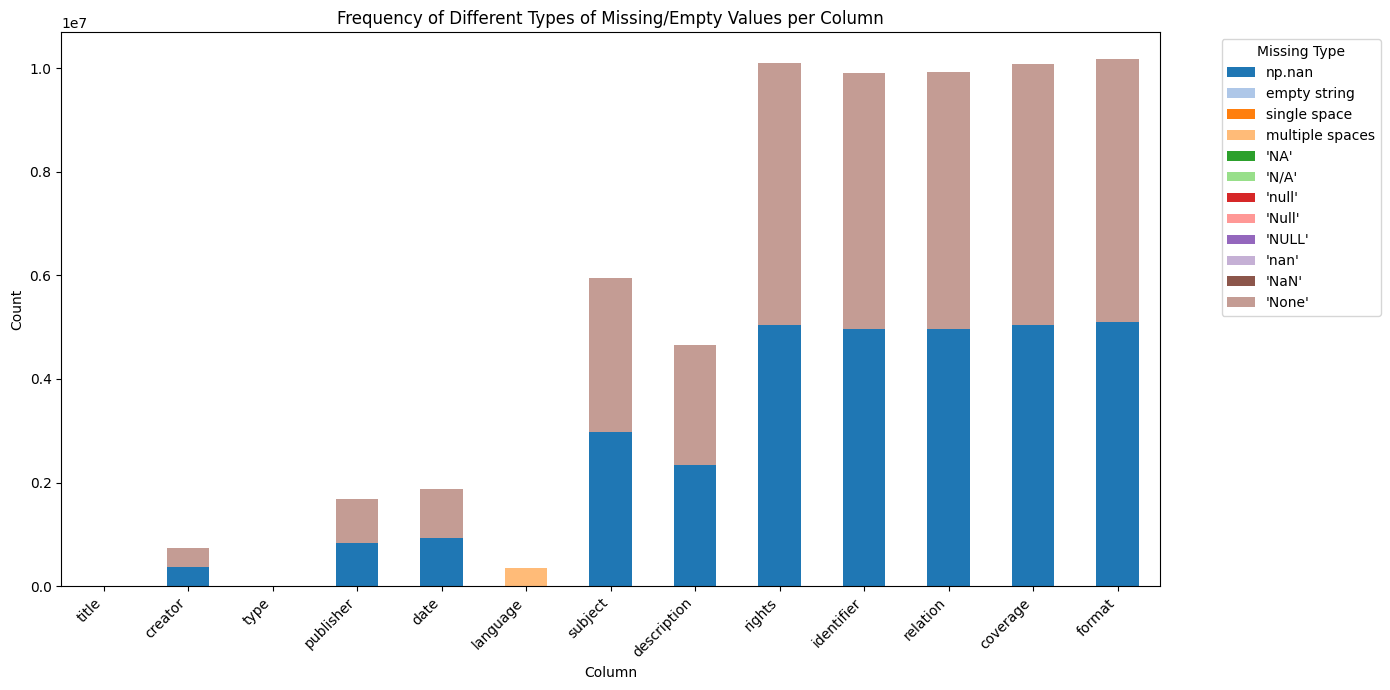

/var/folders/q1/m5hvhjp94dd_krr96zjh7c4c0000gp/T/ipykernel_74754/2351717436.py:235: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_roman = df[date_col].astype(str).str.contains(pattern_roman, regex=True, na=False)


Found 17876 rare book entries with special date formats.
                       date                                              title
191         1979 [i.e.1980]               The several lives of a Victorian vet
278      MDCCCLXIII. [1863]                             British wild flowers /
587       1744 [i.e. 1745]]  An Act for granting and continuing the duties ...
609   M. D. LXIIII.. [1564]  Postilla sev enarratio evangeliorvm, qvae in d...
1154    M,DCC,LXXXI. [1781]  A discourse, adapted to the present day, on th...
1158     MD,CC,LXIX. [1769]  Four sermons on the following important subjec...
1405       1973 [i.e. 1974]           Design guide, health centres in Scotland
2240       1978 [i.e. 1979]  Twenty censuses : population and housing quest...
2431        MDCCCIX. [1809]  Joannis Luzac Lectiones Atticae, de digamia So...
2440     M. DCCC. VI [1806]                      Dictionnaire des beaux-arts /


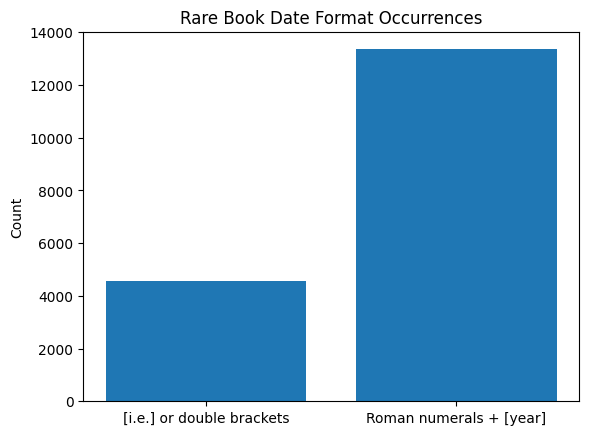

Column: title
  Unique values: 4436541
  Missing values: 2534, 0.05%
  Messy data examples (49): ['At rest among the Laos. Story of the short life and missionary career of Mary M. Campbell / ', 'Pensions for all at sixty and an eight hours day / ', 'Oeconomia Christiana för första gangen / ', 'Letter to the Right Honorable the Earl Grey, prime minister of His Majesty King William IV ... / ', 'School manual of the law of Moses. An abstract, with introduction, explanations, questions, and glossary of some Scripture terms / ']...
  Mixed types: False
  High cardinality: True
  Single value: False
  Normalizations applied:
    - Trimmed whitespace from 43157 values
    - Normalized multiple spaces in 57905 values
    - Removed final stops from 1862131 values
    - Found 248 values with garbage/control characters
    - Found 43848 values with suspicious patterns
  Top 10 value frequencies: {'This shelf mark is no longer used': 8839, 'Annual report /': 3360, 'Poems': 1511, 'Newsletter /': 

In [17]:

def clean_and_analyze(df):
    # Work on a copy - don't modify the original!
    df_clean = df.copy()
    stats = {}
    normalization_log = {}
    for col in df_clean.columns:
        # Step 1: Clean data from missing values and get value counts
        col_data, missing_count, unique_count = get_unique_and_missing_values(df, df_clean, normalization_log, col)
        messy = []
        # Step 2: Column-specific cleaning
        if 'language' in col.lower():
            messy = normalize_language_codes(normalization_log, col, col_data)
             # map codes to full names
            df_clean['language'] = df_clean['language'].map(lang_code_map).fillna(df_clean['language'])
            mapped_languages = df_clean['language'].notna() & df_clean['language'].isin(lang_code_map.values())
            normalization_log[col].append(f"Mapped {len(mapped_languages)} language codes to full names")
        elif 'date' in col.lower():
            normalize_date_format(df_clean, normalization_log, col, col_data, messy)
            print_pre_1450_years(messy)
        elif df_clean[col].dtype == object:
            non_null = col_data.dropna().astype(str)
            needs_trim = non_null[non_null != non_null.str.strip()]
            trim_whitespace(df_clean, normalization_log, col, messy, needs_trim)
            normalize_case_variants(df_clean, normalization_log, col, unique_count, messy)
            clean_extra_spaces(df_clean, normalization_log, col, messy, non_null)
            clean_final_stops(df_clean, normalization_log, col, messy, non_null)
            # Allow Unicode letters, numbers, whitespace, and common punctuation
            # Control characters, replacement characters, etc.            
            detect_suspicious_patterns(normalization_log, col, messy, non_null)
            if 'type' in col.lower():
                clean_type_formats(df_clean, normalization_log, col, unique_count, messy)
        # Step 3: Compile statss
        messy = list(dict.fromkeys([str(m) for m in messy if pd.notna(m)]))
        mixed_types = len(set(type(x).__name__ for x in df_clean[col].dropna())) > 1
        high_cardinality = unique_count > 1000
        single_value = unique_count == 1
        value_counts = df_clean[col].value_counts(dropna=True)
        stats[col] = {
            'unique_count': unique_count,
            'value_counts': value_counts.to_dict(),
            'missing_count': missing_count,
            'missing_count_percentage': missing_count / len(df_clean),
            'messy_data': messy,
            'messy_count': len(messy),
            'mixed_types': mixed_types,
            'high_cardinality': high_cardinality,
            'single_value': single_value,
            'normalizations': normalization_log[col]
        }
        print_everything(df_clean, normalization_log, col, missing_count, unique_count, messy, mixed_types, high_cardinality, single_value, value_counts)
    return df_clean, stats, normalization_log

visualise_missing_value_types(data)
visualise_rare_books(data, date_col='date')
# Usage - original df is unchanged
data_cleaned, data_stats, norm_log = clean_and_analyze(data)
# Original data is still intact
print("Original data unchanged:", data.equals(data))  # Should be True

In [18]:
# save list of subjects to cleaned CSV
pd.Series(data_cleaned.subject.unique()).to_csv('data_cleaned_subjects.csv', index=False, header=False)

# save list of types to cleaned CSV
pd.Series(data_cleaned.type.unique()).to_csv('data_cleaned_types.csv', index=False, header=False)


In [19]:
data_cleaned.type.unique()

array(['text', 'notated music', 'cartographic', ..., 'Atlases1907.aat',
       'Encyclopedia', 'Folktales from around the worldJuvenile fiction'],
      dtype=object)

In [20]:
data_stats["date"]

{'unique_count': 63620,
 'value_counts': {'1995': 80229,
  '1994': 75315,
  '1993': 73267,
  '1992': 72813,
  '2000': 71459,
  '1990': 70208,
  '1999': 69911,
  '1998': 69581,
  '1996': 69187,
  '1991': 69007,
  '1989': 68230,
  '1988': 67348,
  '1997': 65362,
  '1987': 65090,
  '2001': 63287,
  '2002': 62704,
  '1986': 60949,
  '2003': 60188,
  '2005': 57133,
  '1985': 57009,
  '1984': 54745,
  '2004': 54443,
  '2006': 54315,
  '1980': 54068,
  '1979': 53117,
  '1982': 52225,
  '1983': 52095,
  '1978': 52052,
  '1981': 51907,
  '2007': 49298,
  '2009': 47577,
  '1977': 47159,
  '2010': 46409,
  '1976': 44380,
  '1975': 43669,
  '1973': 43369,
  '2011': 43208,
  '2008': 42227,
  '1972': 42054,
  '1974': 41504,
  '1971': 39435,
  '1970': 39309,
  '2012': 38367,
  '1969': 38072,
  '1968': 36346,
  '1967': 31527,
  '1966': 28739,
  '1965': 27784,
  '1964': 25546,
  '1963': 24622,
  '1962': 22536,
  '1960': 20569,
  '1961': 20561,
  '2013': 17979,
  '1958': 17925,
  '1959': 17585,
  '1957'

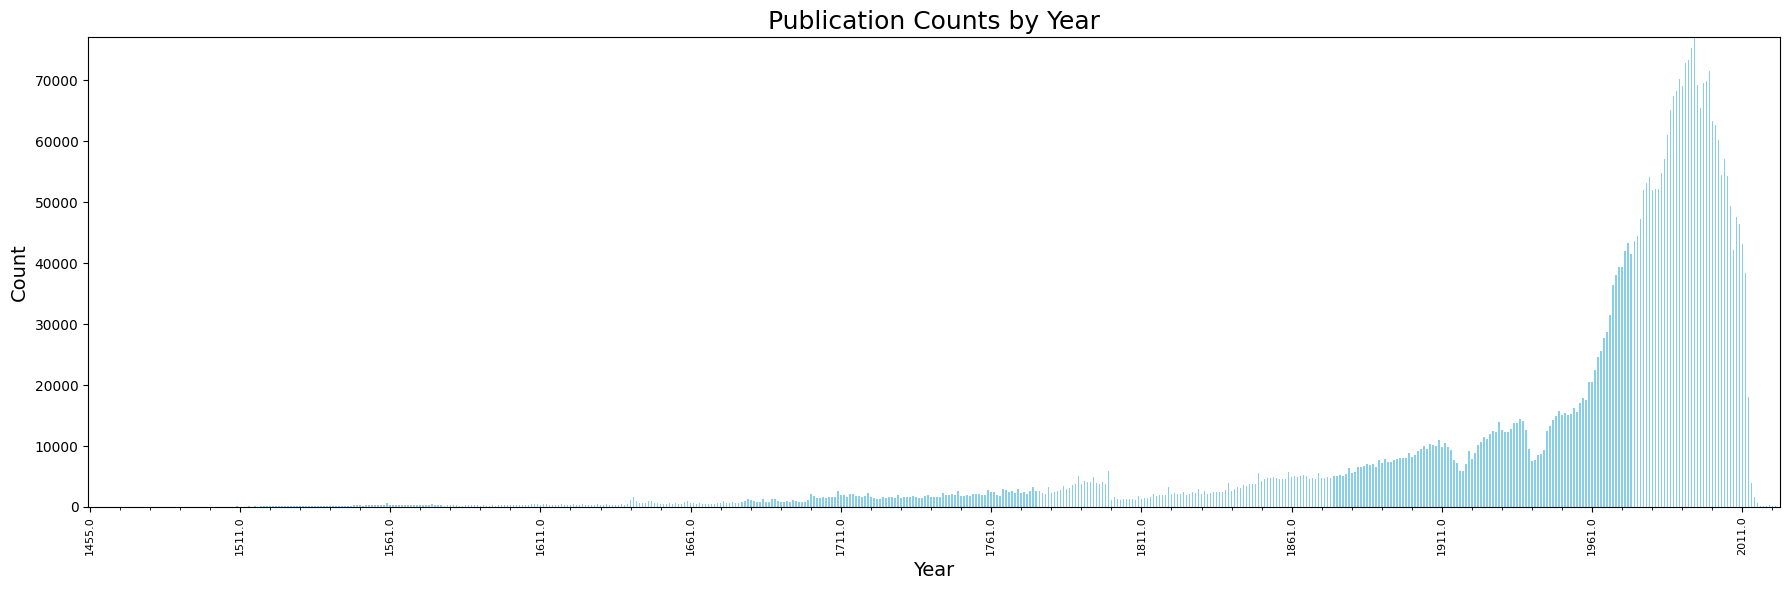

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Visualize the most common publication years (extracting year from 'Date')
data_cleaned['year'] = data_cleaned['date'].str.extract(r'(\d{4})').astype(float)
# Only show years between 1000 and current year
current_year = int(pd.Timestamp.now().year)
valid_years = data_cleaned['year'].dropna()
valid_years = valid_years[(valid_years >= 1000) & (valid_years <= current_year)]
top_years = valid_years.value_counts().sort_index()
# Show only the first 1600 years if desired
top_years = top_years.head(1600)
# Plot with improved readability
fig, ax = plt.subplots(figsize=(18,6))
top_years.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Publication Counts by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
# Show every 50th year label for clarity
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
# Optionally, limit y-axis for better scaling
ax.set_ylim(0, np.percentile(top_years.values, 99)*1.1)
plt.tight_layout()
plt.show()

## Saving cleaned data and stats

In [23]:
print(data_cleaned.head())
# save cleaned data to file
with open('nls-catalogue-published-material/data_cleaned.csv', 'w', encoding='utf-8') as f: 
    data_cleaned.to_csv(f, index=False)  

                                               title  \
0  Anglo-russkii slovar' po mikroelektronike : ok...   
1  Local government finance in Scotland: rate sup...   
2  The correlation of monthly rainfall with posit...   
3                                          Catalogue   
4  Control of pests and diseases of grass and for...   

                                             creator  type  \
0          Prokhorov, K. IA.(Konstantin IAkovlevich)  text   
1                      Great Britain.Scottish Office  text   
2  Commonwealth Scientific and Industrial Researc...  text   
3                        Peter Deloford (Bookseller)  text   
4                                               None  text   

                                           publisher  date language  \
0                               Moskva Russkii iazyk  1985  Russian   
1                        [Edinburgh] Scottish Office  1985  English   
2  Melbourne : Commonwealth Scientific and Indust...  1958  English   
3     

In [25]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
with open('nls-catalogue-published-material/data_stats.json', "w") as file: 
    json.dump(data_stats, file, cls=NpEncoder)

data_stats['language']


{'unique_count': 366,
 'value_counts': {'English': 4171764,
  'French': 125319,
  'German': 108951,
  'Latin': 62185,
  'Undetermined': 47813,
  'Italian': 41031,
  'Russian': 29834,
  'Spanish': 27459,
  'No linguistic content': 21256,
  'Welsh': 16269,
  'Dutch': 9391,
  'Polish': 8158,
  ' ': 7184,
  'Irish': 6936,
  'Swedish': 6344,
  'Danish': 5527,
  'Norwegian': 4962,
  'Portuguese': 4812,
  'Scottish Gaelic': 4761,
  'Greek, Ancient (to 1453)': 3102,
  'Greek, Modern (1453-)': 3048,
  'Multiple languages': 2870,
  'Scots': 2261,
  'Czech': 1800,
  'Arabic': 1745,
  'Chinese': 1725,
  'Catalan': 1179,
  'Romanian': 974,
  'Japanese': 911,
  'Icelandic': 865,
  'Hungarian': 849,
  'Indonesian': 802,
  'Ukrainian': 766,
  'Finnish': 761,
  'Croatian': 725,
  'Breton': 689,
  'Hebrew': 658,
  'Persian': 502,
  'Turkish': 500,
  'Bulgarian': 465,
  'Serbian': 371,
  'Afrikaans': 344,
  'Slovak': 343,
  'Urdu': 310,
  '|||': 299,
  'Swahili': 274,
  'Esperanto': 250,
  'Faroese': 245

In [26]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
with open('nls-catalogue-published-material/data_stats.json', "w") as file: 
    json.dump(data_stats, file, cls=NpEncoder)

data_stats['type']

{'unique_count': 4099,
 'value_counts': {'text': 4564288,
  'notated music': 326979,
  'cartographic': 79208,
  'sound recording': 18821,
  'Periodicals.fast(OCoLC)fst01411641': 13784,
  'Electronic books': 8375,
  'History.fast(OCoLC)fst01411628': 5056,
  'Electronic journals': 4379,
  'still image': 3696,
  'Periodicals.lcgft': 2365,
  "Children's stories.lcsh": 2210,
  'moving image': 1719,
  "Children's stories": 1678,
  "Children's storiesPictorial works.lcsh": 1512,
  'Ballads.aat': 1493,
  'Criticism, interpretation, etc.fast(OCoLC)fst01411635': 1413,
  'software, multimedia': 1259,
  'Love stories.gsafd': 1200,
  'Periodical': 1161,
  'BroadsidesEnglandLondon1801-1900.rbgenr': 1077,
  'BalladsEnglandLondon1801-1900.rbgenr': 1073,
  'Juvenile works.fast(OCoLC)fst01411637': 1049,
  'ChapbooksScotlandGlasgow1801-1900.rbgenr': 821,
  'Periodicals': 749,
  'Graphic novels': 711,
  'Pictorial works.fast(OCoLC)fst01423874': 681,
  'Exhibition catalogs.fast(OCoLC)fst01424028': 652,
  '

In [27]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
with open('nls-catalogue-published-material/data_stats.json', "w") as file: 
    json.dump(data_stats, file, cls=NpEncoder)

data_stats['creator']

{'unique_count': 1715499,
 'value_counts': {"Great Britain.His Majesty's Stationery Office": 13913,
  'Great Britain.Scottish Office Inquiry Reporters': 13084,
  'Centre for Economic Policy Research (Great Britain)': 11049,
  "Great Britain.Her Majesty's Stationery Office": 10117,
  'Scotland.Inquiry Reporters Unit': 7687,
  'APS Group Scotland': 5789,
  'Great Britain.Department of Trade and Industry': 5645,
  'HM Inspectorate of Education (Scotland)': 5304,
  'Stationery Office (Great Britain)': 5073,
  'Great Britain.Parliament.House of Commons': 4345,
  'Inspectorate of Schools (Scotland)': 4206,
  'National Register of Archives (Scotland)': 4107,
  'Scotland.Directorate for Planning and Environmental Appeals': 3635,
  'Organisation for Economic Co-operation and Development': 3626,
  'Commission for Local Administration in England': 3467,
  'Erickson, Ljubica,former owner.StEdNL': 3328,
  'Young Writers (Firm : Peterborough, England)': 3281,
  'Great Britain': 3256,
  'Great Britai

In [28]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
with open('nls-catalogue-published-material/data_stats.json', "w") as file: 
    json.dump(data_stats, file, cls=NpEncoder)

data_stats['date']

{'unique_count': 63620,
 'value_counts': {'1995': 80229,
  '1994': 75315,
  '1993': 73267,
  '1992': 72813,
  '2000': 71459,
  '1990': 70208,
  '1999': 69911,
  '1998': 69581,
  '1996': 69187,
  '1991': 69007,
  '1989': 68230,
  '1988': 67348,
  '1997': 65362,
  '1987': 65090,
  '2001': 63287,
  '2002': 62704,
  '1986': 60949,
  '2003': 60188,
  '2005': 57133,
  '1985': 57009,
  '1984': 54745,
  '2004': 54443,
  '2006': 54315,
  '1980': 54068,
  '1979': 53117,
  '1982': 52225,
  '1983': 52095,
  '1978': 52052,
  '1981': 51907,
  '2007': 49298,
  '2009': 47577,
  '1977': 47159,
  '2010': 46409,
  '1976': 44380,
  '1975': 43669,
  '1973': 43369,
  '2011': 43208,
  '2008': 42227,
  '1972': 42054,
  '1974': 41504,
  '1971': 39435,
  '1970': 39309,
  '2012': 38367,
  '1969': 38072,
  '1968': 36346,
  '1967': 31527,
  '1966': 28739,
  '1965': 27784,
  '1964': 25546,
  '1963': 24622,
  '1962': 22536,
  '1960': 20569,
  '1961': 20561,
  '2013': 17979,
  '1958': 17925,
  '1959': 17585,
  '1957'

In [29]:
for key, val in data_stats.items():
    print(f"{key}: {val['unique_count']} unique values, {val['missing_count']} missing values")

title: 4436541 unique values, 2534 missing values
creator: 1715499 unique values, 366027 missing values
type: 4099 unique values, 1195 missing values
publisher: 774827 unique values, 842500 missing values
date: 63620 unique values, 933847 missing values
language: 366 unique values, 345551 missing values
subject: 200941 unique values, 2972221 missing values
description: 1060129 unique values, 2330858 missing values
rights: 570 unique values, 5049005 missing values
identifier: 120325 unique values, 4957204 missing values
relation: 101604 unique values, 4958592 missing values
coverage: 2388 unique values, 5040337 missing values
format: 13 unique values, 5090834 missing values


In [30]:
with open('nls-catalogue-published-material/norm_log.json', "w") as file: 
        json.dump(norm_log, file)

norm_log



{'title': ['Trimmed whitespace from 43157 values',
  'Normalized multiple spaces in 57905 values',
  'Removed final stops from 1862131 values',
  'Found 248 values with garbage/control characters',
  'Found 43848 values with suspicious patterns'],
 'creator': ['Trimmed whitespace from 34 values',
  'Normalized multiple spaces in 5229 values',
  'Removed final stops from 3836044 values',
  'Found 84 values with garbage/control characters',
  'Found 960 values with suspicious patterns'],
 'type': ['Trimmed whitespace from 835 values',
  'Normalized multiple spaces in 1 values',
  'Removed final stops from 22520 values',
  'Found 13 values with suspicious patterns',
  "Created new column 'type_main' with the first part before '.' from 67966 values"],
 'publisher': ['Trimmed whitespace from 843148 values',
  'Normalized multiple spaces in 106461 values',
  'Removed final stops from 40933 values',
  'Found 42 values with garbage/control characters',
  'Found 2444 values with suspicious patt